In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import re
from datetime import date , datetime, timedelta
import seaborn as sns

In [2]:
df = pd.read_csv('results_jobstreet_datascience_jobs_21Sep21.csv')

In [3]:
df_copy = df.copy(deep = True)

In [4]:
df.head()

,Job Title,Companies,Pay,Location,Date posted,Other information,Job Description,URL
0,Field Application Scientist– Genomic Systems,Research Instruments Pte Ltd,NaN,Singapore,Posted on 20-Sep-21,Remuneration package will be commensurate wit...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/field-appli...
1,Data Scientist - AI,Blowfish Pte Ltd,"SGD 4,500 - SGD 6,000",Central - Others,Posted 19 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...
2,Data Scientist,SILENT EIGHT PTE. LTD.,"SGD 4,500 - SGD 6,000",Singapore,Posted on 15-Sep-21,Employee Stock Ownership Plan Experienced te...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...
3,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,NaN,Singapore River,Posted on 15-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-analys...
4,Food Scientist,Organic Technology SE-ASIA Pte Ltd,"SGD 3,000 - SGD 5,000",West,Posted on 15-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/food-scient...


In [5]:
list(df.columns)

['Job Title',
 'Companies',
 'Pay',
 'Location',
 'Date posted',
 'Other information',
 'Job Description',
 'URL']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          2400 non-null   object
 1   Companies          2400 non-null   object
 2   Pay                856 non-null    object
 3   Location           2387 non-null   object
 4   Date posted        2400 non-null   object
 5   Other information  2400 non-null   object
 6   Job Description    2400 non-null   object
 7   URL                2400 non-null   object
dtypes: object(8)
memory usage: 150.1+ KB


## Eliminating Dups

As we are searching across a couple of terms, I will want to get rid of duplicate entries

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2400 entries, 0 to 2399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          2400 non-null   object
 1   Companies          2400 non-null   object
 2   Pay                856 non-null    object
 3   Location           2387 non-null   object
 4   Date posted        2400 non-null   object
 5   Other information  2400 non-null   object
 6   Job Description    2400 non-null   object
 7   URL                2400 non-null   object
dtypes: object(8)
memory usage: 168.8+ KB


In [9]:
df.drop_duplicates(subset='Job Description' ,inplace = True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 2397
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          1750 non-null   object
 1   Companies          1750 non-null   object
 2   Pay                599 non-null    object
 3   Location           1744 non-null   object
 4   Date posted        1750 non-null   object
 5   Other information  1750 non-null   object
 6   Job Description    1750 non-null   object
 7   URL                1750 non-null   object
dtypes: object(8)
memory usage: 123.0+ KB


## Check for missing values

<AxesSubplot:>

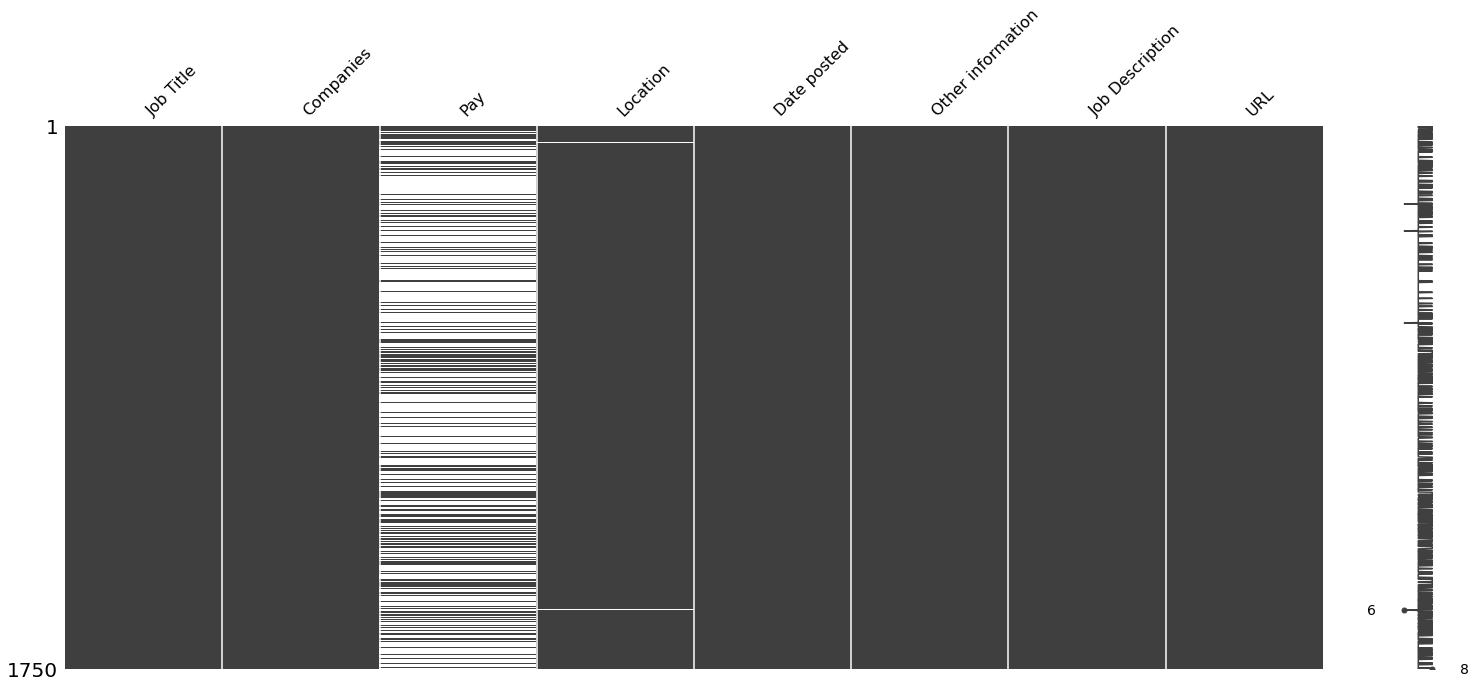

In [11]:
msno.matrix(df)

In [12]:
#check the entry for missing location
df[df['Location'].isnull()]

,Job Title,Companies,Pay,Location,Date posted,Other information,Job Description,URL
56,Data Analyst / Transformation Accountant/Manager,PSA Corporation Limited,"SGD 6,000 - SGD 8,000",NaN,Posted on 16-Sep-21,"Manager Bachelor's Degree Others, Others 19970...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-analys...
252,Senior Big Data Developer (Hadoop),Marina Bay Sands Pte Ltd,NaN,NaN,Posted on 20-Sep-21,Senior Executive Advanced/Higher/Graduate Dipl...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/senior-big-...
341,"Manager, Engineering Data Analysis (Data Science)",Marina Bay Sands Pte Ltd,NaN,NaN,Posted on 10-Sep-21,"Manager Bachelor's Degree Sciences, Actuarial/...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/manager-eng...
674,"Lead Engineer, IT Data Center Operations",Marina Bay Sands Pte Ltd,NaN,NaN,Posted on 15-Sep-21,Senior Executive Bachelor's Degree Computer/In...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/lead-engine...
1423,Sales Analyst/ Senior Sales Analyst,Federal Express (S) Pte Ltd,"SGD 3,000 - SGD 4,000",NaN,Posted 22 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/sales-analy...
2028,Research Engineer (Machine Learning/Image Anal...,Singapore Institute of Technology,NaN,NaN,Posted on 6-Sep-21,Junior Executive Bachelor's Degree Education/T...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/research-en...


In [13]:
#imputing empty location with Singapore
df.Location.fillna('Singapore', inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 2397
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Job Title          1750 non-null   object
 1   Companies          1750 non-null   object
 2   Pay                599 non-null    object
 3   Location           1750 non-null   object
 4   Date posted        1750 non-null   object
 5   Other information  1750 non-null   object
 6   Job Description    1750 non-null   object
 7   URL                1750 non-null   object
dtypes: object(8)
memory usage: 123.0+ KB


## Cleaning up Pay

I noticed that some information on Pay is in the location column 

In [15]:
#I replace it with a string so i can perform string operations in column
df.Pay.fillna('temp', inplace=True)

In [16]:
df.head()

,Job Title,Companies,Pay,Location,Date posted,Other information,Job Description,URL
0,Field Application Scientist– Genomic Systems,Research Instruments Pte Ltd,temp,Singapore,Posted on 20-Sep-21,Remuneration package will be commensurate wit...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/field-appli...
1,Data Scientist - AI,Blowfish Pte Ltd,"SGD 4,500 - SGD 6,000",Central - Others,Posted 19 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...
2,Data Scientist,SILENT EIGHT PTE. LTD.,"SGD 4,500 - SGD 6,000",Singapore,Posted on 15-Sep-21,Employee Stock Ownership Plan Experienced te...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...
3,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,temp,Singapore River,Posted on 15-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-analys...
4,Food Scientist,Organic Technology SE-ASIA Pte Ltd,"SGD 3,000 - SGD 5,000",West,Posted on 15-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/food-scient...


In [17]:
#I will seperate the pay into lower and upper bound
#Removing currency first and other characters
df.Pay = df.Pay.apply(lambda x : x.replace('SGD',''))
df.Pay = df.Pay.apply(lambda x : x.replace('- ',''))
df.Pay = df.Pay.apply(lambda x : x.replace(' ',''))
df.Pay = df.Pay.apply(lambda x : x.replace(',',''))

In [18]:
df['Pay_lower_bound'] = 0

In [19]:
df.head()

,Job Title,Companies,Pay,Location,Date posted,Other information,Job Description,URL,Pay_lower_bound
0,Field Application Scientist– Genomic Systems,Research Instruments Pte Ltd,temp,Singapore,Posted on 20-Sep-21,Remuneration package will be commensurate wit...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/field-appli...,0
1,Data Scientist - AI,Blowfish Pte Ltd,4500 6000,Central - Others,Posted 19 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...,0
2,Data Scientist,SILENT EIGHT PTE. LTD.,4500 6000,Singapore,Posted on 15-Sep-21,Employee Stock Ownership Plan Experienced te...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...,0
3,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,temp,Singapore River,Posted on 15-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-analys...,0
4,Food Scientist,Organic Technology SE-ASIA Pte Ltd,3000 5000,West,Posted on 15-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/food-scient...,0


In [20]:
df['Pay_lower_bound'] = df.Pay.apply(lambda x : x[0:int(len(x)/2)])
df['Pay_upper_bound'] = df.Pay.apply(lambda x : x[int(len(x)/2):])
df.drop(columns='Pay', inplace = True)

In [21]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_lower_bound,Pay_upper_bound
0,Field Application Scientist– Genomic Systems,Research Instruments Pte Ltd,Singapore,Posted on 20-Sep-21,Remuneration package will be commensurate wit...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/field-appli...,te,mp
1,Data Scientist - AI,Blowfish Pte Ltd,Central - Others,Posted 19 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...,4500,6000
2,Data Scientist,SILENT EIGHT PTE. LTD.,Singapore,Posted on 15-Sep-21,Employee Stock Ownership Plan Experienced te...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...,4500,6000
3,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,Posted on 15-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-analys...,te,mp
4,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,Posted on 15-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/food-scient...,3000,5000


In [22]:
df.Pay_lower_bound = df.Pay_lower_bound.apply(lambda x : x.replace('te',"NaN"))
df.Pay_upper_bound = df.Pay_upper_bound.apply(lambda x : x.replace('mp',"NaN"))

In [23]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_lower_bound,Pay_upper_bound
0,Field Application Scientist– Genomic Systems,Research Instruments Pte Ltd,Singapore,Posted on 20-Sep-21,Remuneration package will be commensurate wit...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/field-appli...,NaN,NaN
1,Data Scientist - AI,Blowfish Pte Ltd,Central - Others,Posted 19 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...,4500,6000
2,Data Scientist,SILENT EIGHT PTE. LTD.,Singapore,Posted on 15-Sep-21,Employee Stock Ownership Plan Experienced te...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...,4500,6000
3,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,Posted on 15-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-analys...,NaN,NaN
4,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,Posted on 15-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/food-scient...,3000,5000


<AxesSubplot:>

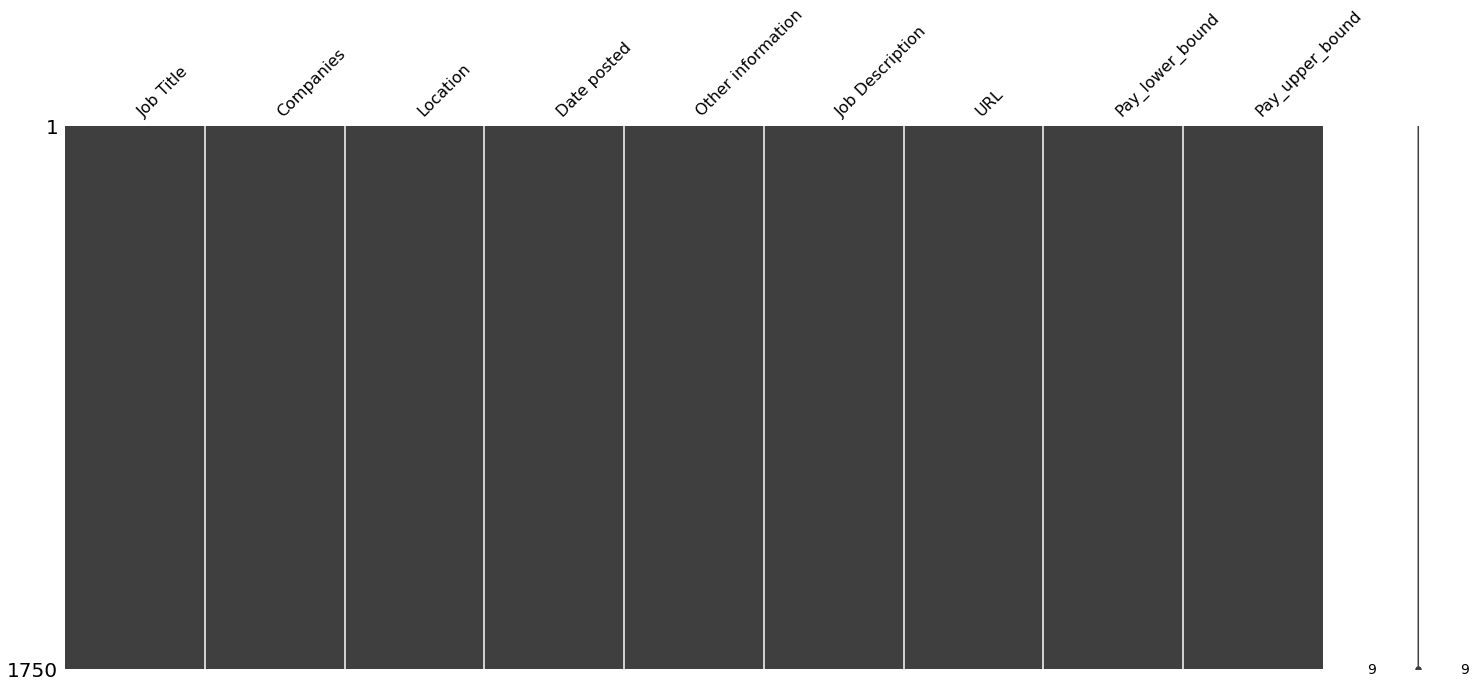

In [24]:
msno.matrix(df)

In [25]:
df.Pay_lower_bound = df.Pay_lower_bound.apply(lambda x : float(x))

In [26]:
df.Pay_upper_bound = df.Pay_upper_bound.apply(lambda x : float(x))

In [27]:
df['Pay_average']=(df['Pay_lower_bound'] + df['Pay_upper_bound'])/2

In [28]:
df.drop(columns = ['Pay_lower_bound','Pay_upper_bound'], inplace = True)

In [29]:
df['Job Title'] = df['Job Title'].astype(str)
df['Companies'] = df['Companies'].astype(str)
df['Other information'] = df['Other information'].astype(str)
df['Job Description'] = df['Job Description'].astype(str)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 2397
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1750 non-null   object 
 1   Companies          1750 non-null   object 
 2   Location           1750 non-null   object 
 3   Date posted        1750 non-null   object 
 4   Other information  1750 non-null   object 
 5   Job Description    1750 non-null   object 
 6   URL                1750 non-null   object 
 7   Pay_average        599 non-null    float64
dtypes: float64(1), object(7)
memory usage: 123.0+ KB


In [31]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average
0,Field Application Scientist– Genomic Systems,Research Instruments Pte Ltd,Singapore,Posted on 20-Sep-21,Remuneration package will be commensurate wit...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/field-appli...,NaN
1,Data Scientist - AI,Blowfish Pte Ltd,Central - Others,Posted 19 hours ago,"Junior Executive Bachelor's Degree, Post Gradu...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...,5250.0
2,Data Scientist,SILENT EIGHT PTE. LTD.,Singapore,Posted on 15-Sep-21,Employee Stock Ownership Plan Experienced te...,"<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-scient...,5250.0
3,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,Posted on 15-Sep-21,"Entry Level Bachelor's Degree, Post Graduate D...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/data-analys...,NaN
4,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,Posted on 15-Sep-21,"International environment, awesome colleagues...","<div class=""vDEj0_0"" data-automation=""jobDescr...",http://www.jobstreet.com.sg/en/job/food-scient...,4000.0


## Cleaning up Job Description

Job Description has a lot of html tags that I would need to clean up

In [32]:
df['Job Description'][0]

'<div class="vDEj0_0" data-automation="jobDescription"><span class="sx2jih0 zcydq82q _18qlyvc0 _18qlyvcv _18qlyvc1 _18qlyvc8"><div class="sx2jih0"><p>At\xa0<strong>Research Instruments</strong>, we are committed to facilitating access to state-of-the-art research tools by continually introducing new technologies, providing complete solutions to customers. We are dedicated to being a vital source for scientific research bringing leading-edge solutions to enable our clients to thrive.\xa0The passion, the resourcefulness, and the creativity of our employees are the driving forces behind our success on a regional scale, enabling us to create sustainable growth and value in today’s growing life science industry.</p><p><strong>Field Application Scientist– Genomic Systems</strong></p><p>Candidate should have the following qualifications:\xa0</p><ul><li>Degree, preferably advanced degree (MSc or PhD) in Biomedical Science, Genomics, Genetics, Molecular Biology, Biochemistry or Bioinformatics. 

In [33]:
def cleanup_jobdescription(jd_string):
    html_tags_regex = re.compile(r'(\xa0)|(<.*?>)')
    return re.sub(html_tags_regex, '', jd_string)

In [34]:
cleanup_jobdescription(df['Job Description'][0])

'AtResearch Instruments, we are committed to facilitating access to state-of-the-art research tools by continually introducing new technologies, providing complete solutions to customers. We are dedicated to being a vital source for scientific research bringing leading-edge solutions to enable our clients to thrive.The passion, the resourcefulness, and the creativity of our employees are the driving forces behind our success on a regional scale, enabling us to create sustainable growth and value in today’s growing life science industry.Field Application Scientist– Genomic SystemsCandidate should have the following qualifications:Degree, preferably advanced degree (MSc or PhD) in Biomedical Science, Genomics, Genetics, Molecular Biology, Biochemistry or Bioinformatics. Minimum 2 years of relevant experience would be preferred.Demonstrated experience with NGS workflows and data analysis software and/or associated analysis software. Ability to interpret NGS datasets considered a plus.Good

In [35]:
df['Job Description'] = df['Job Description'].apply(cleanup_jobdescription)

In [36]:
df['Job Description'].sample(10)

504     We are looking for a highly motivated candidat...
2038    [emailprotected] Corporate Lab is currently lo...
165     JOB PURPOSEAPAC IThas built an Enterprise Info...
97      Responsibilities:Help to design and implement ...
346     Internal Audit is an independent function that...
435     The School of Biological Sciences islooking fo...
43      Job Description:The Data Science Lead leads hi...
2245    A Research Engineer I position is available in...
2198    Research Assistant (Computer Science/Computer ...
530     ReesponsibilitiesIdentify business needsWork w...
Name: Job Description, dtype: object

In [37]:
#Cheking if Job Description contains Pay information

In [38]:
df[df['Job Description'].str.contains('SGD')]

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average
209,Pyspark Python Developer,ARYAN SOLUTIONS PTE. LTD.,Singapore,Posted on 20-Sep-21,"Senior Executive Diploma, Advanced/Higher/Grad...","Salary: SGD 8000-9000 / MonthSkills: Pyspark, ...",http://www.jobstreet.com.sg/en/job/pyspark-pyt...,NaN
692,Pyspark Python Developer,ARYAN SOLUTIONS PTE. LTD.,Singapore,Posted on 20-Sep-21,"Senior Executive Diploma, Advanced/Higher/Grad...","Salary: SGD 8000-9000 / MonthSkills: Pyspark, ...",http://www.jobstreet.com.sg/en/job/pyspark-pyt...,7000.0
1609,Pyspark Python Developer,ARYAN SOLUTIONS PTE. LTD.,Singapore,Posted on 20-Sep-21,"Senior Executive Diploma, Advanced/Higher/Grad...","Salary: SGD 8000-9000 / MonthSkills: Pyspark, ...",http://www.jobstreet.com.sg/en/job/pyspark-pyt...,3600.0
1685,#SGUnitedTraineeships - Service Ops Excellence...,Johnson Controls (S) Pte Ltd,West,Posted on 17-Sep-21,MNC Flexible work arrangements Performance ...,Role Description:Conduct analysis on trending ...,http://www.jobstreet.com.sg/en/job/sgunitedtra...,4500.0
1949,Pyspark Python Developer,ARYAN SOLUTIONS PTE. LTD.,Singapore,Posted on 20-Sep-21,"Senior Executive Diploma, Advanced/Higher/Grad...","Salary: SGD 8000-9000 / MonthSkills: Pyspark, ...",http://www.jobstreet.com.sg/en/job/pyspark-pyt...,6500.0
2373,Data Scientist,ARYAN SOLUTIONS PTE. LTD.,"10,000 - SGD 12,000",Posted on 4-Sep-21,Senior Executive Primary/Secondary School/O Le...,We are looking for a Data Scientist with an In...,http://www.jobstreet.com.sg/en/job/data-scient...,8500.0


## Cleaning up Posted on

In [39]:
def cleanup_posted(posted_string):
    date_regex = re.compile(r'Posted on |Posted ')
    return re.sub(date_regex, '', posted_string)

In [40]:
df['Date posted'] = df['Date posted'].apply(cleanup_posted)

In [41]:
df['Date posted'].sample(10)

1062       16-Sep-21
2071       13-Sep-21
205        15-Sep-21
114        17-Sep-21
1472    22 hours ago
943        20-Sep-21
186        11-Sep-21
1677       15-Sep-21
472        15-Sep-21
1349       12-Sep-21
Name: Date posted, dtype: object

In [42]:
df['Date posted'] = pd.to_datetime(df['Date posted'], errors='coerce')

In [43]:
df['Date posted'].fillna(datetime(2021, 9, 21), inplace = True)

## Getting information out of Other information

Right now all of the information is more or less settled except for the strings in the Job Description and the other information where qualifications, information on the company is provided<br>
The information that i want to capture are<br> <li>the skills needed - Sklearn, Spark, Computer Vision, etc<li>the number of years the job requires<li>qualification needed<li>Job Description

In [44]:
list(df['Other information'].sample(5))

["Junior Executive Bachelor's Degree, Post Graduate Diploma, Professional Degree, Master's Degree 2 years Full-Time Computer/Information Technology, IT-Software, Sales/Marketing, E-commerce 200701282M 01C4394 01C4394 51 - 200 Employees 27 days Human Resources Management / Consulting",
 " Opportunity to be employed in fast growing Enterprise  Positive learning environment  Increase recognition and career progression Senior Executive Bachelor's Degree, Post Graduate Diploma, Professional Degree 3 years Full-Time Computer/Information Technology, IT-Software 201409838G 1 - 50 Employees 16 days Computer / Information Technology (Software) Medical, Regular hours, Mondays - Fridays, Casual (e.g. T-shirts), Bonus",
 "Senior Executive Bachelor's Degree, Post Graduate Diploma, Professional Degree 5 years Full-Time Computer/Information Technology, IT-Network/Sys/DB Admin, IT-Software 199804751N 18S9099 201 - 500 Employees 30 days Human Resources Management / Consulting",
 "Senior Executive Diplom

In [45]:
list(df.sample(5)['Other information'])

["Senior Executive Diploma, Advanced/Higher/Graduate Diploma, Bachelor's Degree, Post Graduate Diploma, Professional Degree 2 years Full-Time Computer/Information Technology, IT-Software, Accounting/Finance, Banking/Financial 199601303W 99C4599 R1104601 201 - 500 Employees 29 days Human Resources Management / Consulting",
 'Junior Executive Primary/Secondary School/O Level 1 year Full-Time Computer/Information Technology, IT-Software, IT-Network/Sys/DB Admin 200618166E 17C8975 R1875181 1 - 50 Employees 18 days Human Resources Management / Consulting',
 'Junior Executive Not Specified Contract Admin/Human Resources, Human Resources 200002698Z 1001 - 2000 Employees 17 days Healthcare / Medical Regular hours, Mondays - Fridays, Business (e.g. Shirts), Subject to Designation',
 "Senior Executive Diploma, Advanced/Higher/Graduate Diploma, Bachelor's Degree, Post Graduate Diploma, Professional Degree 8 years Full-Time Computer/Information Technology, IT-Software 200607340H 11C3373 R1544992 1

It appears that most of the information in other information follows the following format<br>
<li>Company information if available
<li>Position Level (entry, junior/Senior Exec, etc)
<li>Qualifications
<li>Years of Experience
<li>position type (Full time, contract, part time)


In [46]:
qualification_list = ('Professional Certificate', 'NiTEC ', "Bachelor's Degree", 'Diploma', 'Advanced/Higher/Graduate Diploma', 'Post Graduate Diploma' , 'Professional Degree', "Master's Degree" , 'Doctorate (PhD)',
                     'Primary/Secondary School/O Level')
position_list = ('Non-Executive','Entry Level', 'Junior Executive' , 'Senior Executive', 'Manager', 'Senior Manager')
employment_type_list = ('Full-Time', 'Part-Time', 'Contract',)

In [47]:
def returnhits(a_list, x):
    return(' , '.join(a for a in a_list if a in x))

In [48]:
#Creating Columns to contain the information needed
df['Qualifications'] = df['Other information'].apply(lambda x : returnhits(qualification_list, x))
df['Position'] = df['Other information'].apply(lambda x : returnhits(position_list, x))
df['Employment Type'] = df['Other information'].apply(lambda x : returnhits(employment_type_list, x))

In [49]:
df['Position'] = df['Position'].apply(lambda x : x.replace("","Not indicated") if x =='' else x)

In [50]:
#Checking if qualifactions are available in the other informaiton of those job postings that are empty
#I notice that they are not inside 
list(df[df['Qualifications'] == ""]['Other information'])

[' Employee Stock Ownership Plan  Experienced team  100% remote work forever Senior Executive Not Specified 3 years Full-Time Computer/Information Technology, IT-Software 201319282M 51 - 200 Employees Computer / Information Technology (Software) Dental, Medical, Regular hours, Mondays - Fridays, Business (e.g. Shirts), Benefit from the attractive Employee Stock Ownership Plan',
 'Senior Executive Not Specified 5 years Full-Time Services, Logistics/Supply Chain 199300545M 501 - 1000 Employees 20 days Transportation / Logistics Dental, Miscellaneous allowance, Medical, Business (e.g. Shirts), Rotating Off & Rest day Joo Koon',
 'Junior Executive Not Specified 2 years Full-Time Computer/Information Technology, IT-Software 200723468K More than 5000 Employees 9 days Computer / Information Technology (Software) Regular hours, Mondays - Fridays',
 'Senior Executive Not Specified 3 years Full-Time Computer/Information Technology, IT-Software 201300296D 201 - 500 Employees 25 days Retail / Merc

In [51]:
#Imputing those to state not indicated
df['Qualifications'] = df['Qualifications'].apply(lambda x : x.replace("","Not indicated") if x =='' else x)

In [52]:
#Checking the same thing for employment type
list(df[df['Employment Type'] == ""]['Other information'])

["Manager Bachelor's Degree Others, Others 199706229Z More than 5000 Employees Transportation / Logistics Dental, Education support, Medical, Sports (e.g. Gym), Vision, Office attire or Engineering overall, Office hours or shift work, depending on job.",
 "Entry Level Diploma, Advanced/Higher/Graduate Diploma, Bachelor's Degree, Post Graduate Diploma, Professional Degree Internship Sciences, Actuarial/Statistics, Computer/Information Technology, IT-Software 200510503Z More than 5000 Employees 30 days BioTechnology/Pharmaceutical/Clinical research Regular hours, Mondays - Fridays, -",
 'Senior Manager Doctorate (PhD) Sciences, Science & Technology 199803715K 201 - 500 Employees 30 days R&D Dental, Medical, Regular hours, Mondays - Fridays, Casual (e.g. T-shirts) Singapore',
 'Senior Manager Doctorate (PhD) 1 year Engineering, Other Engineering 199803715K 201 - 500 Employees 30 days R&D Dental, Medical, Regular hours, Mondays - Fridays, Casual (e.g. T-shirts) Singapore',
 'Senior Manager

In [53]:
#indicating not indicated
df['Employment Type'] = df['Employment Type'].apply(lambda x : x.replace("","Not indicated") if x =='' else x)

In [54]:
df.sample(5)

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type
496,"Manager, Business Analyst - Data Management Of...",United Overseas Bank Limited (UOB),Singapore,2021-09-07,"Manager Diploma, Advanced/Higher/Graduate Dipl...",About UOBUnited Overseas Bank Limited (UOB) is...,http://www.jobstreet.com.sg/en/job/manager-bus...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Manager,Full-Time
1413,"Manager/Analyst, Yield Management (Liner Stand...",Pacific International Lines (Pte) Ltd,Central,2021-09-21,"Manager Diploma, Advanced/Higher/Graduate Dipl...",We are looking for individual with good leader...,http://www.jobstreet.com.sg/en/job/manager-ana...,4000.0,"Bachelor's Degree , Diploma , Advanced/Higher/...",Manager,Full-Time
1347,[GOVT] Business Analyst (Exec) | $4000/Month |...,BGC Group (Outsourcing),Central,2021-09-18,"Junior Executive Bachelor's Degree, Post Gradu...","11 Months contractDegree in Psychology, Busine...",http://www.jobstreet.com.sg/en/job/%5Bgovt%5D-...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,"Full-Time , Contract"
1857,Lead Data Scientist [Central/ Up To $10000] (I...,PERSOLKELLY Singapore Pte Ltd (Formerly Kelly ...,Central,2021-09-17,"Senior Executive Diploma, Advanced/Higher/Grad...","Our esteemed client is looking for aLead, Data...",http://www.jobstreet.com.sg/en/job/lead-data-s...,NaN,"Diploma , Advanced/Higher/Graduate Diploma",Senior Executive,Full-Time
272,Research Scientist (Hardware Assurance) (R0000...,Nanyang Technological University,West,2021-09-13,"Junior Executive Bachelor's Degree, Post Gradu...",Temasek Laboratories is looking for a candidat...,http://www.jobstreet.com.sg/en/job/research-sc...,6000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time


### Extracting Number of Years

In [55]:
num_years_regex = re.compile(r'(\d{1,2} years)')
df['Years of Experience'] = df['Other information'].apply(lambda x : str((num_years_regex.findall(x))))
df['Years of Experience'] = df['Years of Experience'].apply(lambda x : 'Not indicated' if x =='[]' else x )
df['Years of Experience'] = df['Years of Experience'].apply(lambda x : x.replace("'",''))
df['Years of Experience'] = df['Years of Experience'].apply(lambda x : x.replace("[",''))
df['Years of Experience'] = df['Years of Experience'].apply(lambda x : x.replace("]",''))
df['Years of Experience'] = df['Years of Experience'].apply(lambda x : x.replace(" years",''))
#I notice that some titles have bot Senior Manager and Manager title probably because of the word Manager that is common 
df['Position'] = df['Position'].apply(lambda x : 'Senior Manager' if x == 'Manager , Senior Manager' else x )

In [56]:
df.sample(5)

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience
438,Cloud Data Engineer (Ref 24404),JOBLINE RESOURCES PTE. LTD.,tiple work locations,2021-09-11,"Senior Executive Diploma, Advanced/Higher/Grad...",Responsibilities:- Dive into company data to i...,http://www.jobstreet.com.sg/en/job/cloud-data-...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,"Full-Time , Contract",5
716,Data Engineer – Ecommerce | Open-source Data W...,Spring Professional (Singapore) Pte Ltd,Central,2021-09-07,"Senior Executive Bachelor's Degree, Post Gradu...",About the Client:Our client is a market leader...,http://www.jobstreet.com.sg/en/job/data-engine...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,4
1573,Portfolio Analyst (REITS / Real estate) (ID: 5...,PERSOLKELLY Singapore Pte Ltd (Formerly Kelly ...,Central,2021-09-21,"Junior Executive Bachelor's Degree, Post Gradu...",The incumbent will support the Portfolio Manag...,http://www.jobstreet.com.sg/en/job/portfolio-a...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,Not indicated
276,Research Associate (Bioinformatics-Bio-Data Sc...,Nanyang Technological University,Singapore,2021-09-13,Junior Executive Master's Degree 1 year Full-T...,A Research Associate (Bioinformatics/Bio-Data ...,http://www.jobstreet.com.sg/en/job/research-as...,NaN,Master's Degree,Junior Executive,Full-Time,Not indicated
579,Required Senior Business Analyst/Lead Business...,Path Infotech Pte Ltd,Singapore,2021-09-21,"Senior Executive Bachelor's Degree, Post Gradu...",Role and Responsibilities·Support product owne...,http://www.jobstreet.com.sg/en/job/required-se...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Contract,7


### Extracting Pay from location

<AxesSubplot:>

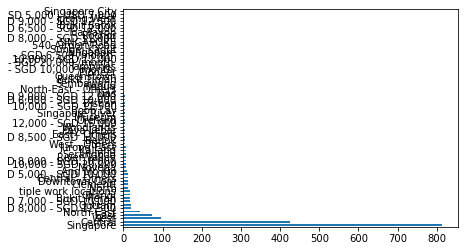

In [57]:
df['Location'].value_counts().plot(kind='barh')

Some locations have the pay range instead I will use regex to extract these information out

In [58]:
pay_regex = re.compile(r'D? ?\d{1,3},\d{3} - SGD ?\d{1,3},\d{3}\s{0,10}?')

I realise that the regex couldnt work because there is a \xa character inside. So i called the function cleanup_jobdescription that was meant for the job description to clean up locations

In [59]:
#since I already have a function for Job Description I will use it to clean up location as well
df.Location = df.Location.apply(cleanup_jobdescription)

In [60]:
df['Pay2'] = df['Location'].apply(lambda x : str((pay_regex.findall(x))))

In [61]:
#checking the rows where the pay is captured in location. It appears that some already have pay included. 
df[df.Pay2 != '[]'].head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
21,Biz Data Analyst (Senior) [Up to $10000 basic]...,RecruitPlus Consulting Pte Ltd,"D7,000 - SGD10,000",2021-09-21,"Entry Level Bachelor's Degree, Post Graduate D...",Major logistics and supply chain companyGreat ...,http://www.jobstreet.com.sg/en/job/biz-data-an...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Full-Time,Not indicated,"['D7,000 - SGD10,000']"
33,Data Science Specialist(IT)/ MNC/Central/S$10K...,Achieve Career Consultant Pte Ltd,"10,000 - SGD20,000",2021-09-21,"Senior Executive Bachelor's Degree, Post Gradu..."," Up till S$10,000 Higher (12 months contract)...",http://www.jobstreet.com.sg/en/job/data-scienc...,6000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,"Full-Time , Contract",4,"['10,000 - SGD20,000']"
34,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,"D8,000 - SGD12,500",2021-09-21,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,http://www.jobstreet.com.sg/en/job/data-scienc...,6000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,"['D8,000 - SGD12,500']"
49,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,"D8,000 - SGD12,500",2021-09-20,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,http://www.jobstreet.com.sg/en/job/data-scienc...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,"['D8,000 - SGD12,500']"
70,Data Science Specialist (IT)/ (MNC/ Central/ S...,Achieve Career Consultant Pte Ltd,"10,000 - SGD20,000",2021-09-19,"Senior Executive Bachelor's Degree, Post Gradu..."," Up till S$10,000 Higher (12 months contract)...",http://www.jobstreet.com.sg/en/job/data-scienc...,3150.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,"Full-Time , Contract",4,"['10,000 - SGD20,000']"


At this point I'm rather puzzled why there are two pay included.<br>
Plus there is also a possibility in the pay being available or stated in the Job Description section..<br>
I think the best approach is impute the pay gathered from location field into the pay columns and then rename the invalid locations to be 'Singapore' instead

In [62]:
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace("SGD",''))
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace("D",''))
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace(",",''))
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace("'",''))
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace("[",''))
df['Pay2'] = df['Pay2'].apply(lambda x : x.replace("]",''))

In [63]:
#37 instances where this happens
df[df['Pay2'] != '']['Pay2'].count()

79

In [64]:
df[df['Pay2'] != ''].head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
21,Biz Data Analyst (Senior) [Up to $10000 basic]...,RecruitPlus Consulting Pte Ltd,"D7,000 - SGD10,000",2021-09-21,"Entry Level Bachelor's Degree, Post Graduate D...",Major logistics and supply chain companyGreat ...,http://www.jobstreet.com.sg/en/job/biz-data-an...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Full-Time,Not indicated,7000 - 10000
33,Data Science Specialist(IT)/ MNC/Central/S$10K...,Achieve Career Consultant Pte Ltd,"10,000 - SGD20,000",2021-09-21,"Senior Executive Bachelor's Degree, Post Gradu..."," Up till S$10,000 Higher (12 months contract)...",http://www.jobstreet.com.sg/en/job/data-scienc...,6000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,"Full-Time , Contract",4,10000 - 20000
34,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,"D8,000 - SGD12,500",2021-09-21,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,http://www.jobstreet.com.sg/en/job/data-scienc...,6000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,8000 - 12500
49,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,"D8,000 - SGD12,500",2021-09-20,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,http://www.jobstreet.com.sg/en/job/data-scienc...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,8000 - 12500
70,Data Science Specialist (IT)/ (MNC/ Central/ S...,Achieve Career Consultant Pte Ltd,"10,000 - SGD20,000",2021-09-19,"Senior Executive Bachelor's Degree, Post Gradu..."," Up till S$10,000 Higher (12 months contract)...",http://www.jobstreet.com.sg/en/job/data-scienc...,3150.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,"Full-Time , Contract",4,10000 - 20000


In [65]:
#getting the average instead of having upper and lower bounds
df['Pay2'] = df['Pay2'].apply(lambda x: ((int(x[:int(len(x)/2)-2]) + int(x[int(len(x)/2)+1:]) )/2) if x !='' else 'NaN')

In [66]:
df[df['Pay2'] != '']

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
0,Field Application Scientist– Genomic Systems,Research Instruments Pte Ltd,Singapore,2021-09-20,Remuneration package will be commensurate wit...,"AtResearch Instruments, we are committed to fa...",http://www.jobstreet.com.sg/en/job/field-appli...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2,NaN
1,Data Scientist - AI,Blowfish Pte Ltd,Central - Others,2021-09-21,"Junior Executive Bachelor's Degree, Post Gradu...",Job OverviewWe are hiring a data scientists to...,http://www.jobstreet.com.sg/en/job/data-scient...,5250.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2,NaN
2,Data Scientist,SILENT EIGHT PTE. LTD.,Singapore,2021-09-15,Employee Stock Ownership Plan Experienced te...,"At Silent Eight, we develop our own AI-based p...",http://www.jobstreet.com.sg/en/job/data-scient...,5250.0,Not indicated,Senior Executive,Full-Time,3,NaN
3,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,2021-09-15,"Entry Level Bachelor's Degree, Post Graduate D...",Job descriptionYou will be part of the Data Sc...,http://www.jobstreet.com.sg/en/job/data-analys...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Contract,Not indicated,NaN
4,Food Scientist,Organic Technology SE-ASIA Pte Ltd,West,2021-09-15,"International environment, awesome colleagues...",Part time role(3 days per week) and will suppo...,http://www.jobstreet.com.sg/en/job/food-scient...,4000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Part-Time,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,Project Officer (Software Engineering) (R00002...,Nanyang Technological University,West,2021-09-15,"Junior Executive Bachelor's Degree, Post Gradu...",School of Computer Science and Engineering inv...,http://www.jobstreet.com.sg/en/job/project-off...,3500.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,Not indicated,NaN
2392,Research Engineer (Computer Science) (R00005747),Nanyang Technological University,Singapore,2021-09-16,"Junior Executive Bachelor's Degree, Post Gradu...",Continental-NTU Corporate Lab invites applicat...,http://www.jobstreet.com.sg/en/job/research-en...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2,NaN
2393,Backend Engineer Intern (Computer Vision)-2022,Bytedance Pte. Ltd.,Singapore,2021-09-17,"Junior Executive Bachelor's Degree, Post Gradu...","ResponsibilitiesFounded in 2012, ByteDance's m...",http://www.jobstreet.com.sg/en/job/backend-eng...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,2,NaN
2394,Project Officer (Computer Science & Engineerin...,Nanyang Technological University,Singapore,2021-09-15,"Junior Executive Bachelor's Degree, Post Gradu...",Singtel Cognitive and Artificial Intelligence ...,http://www.jobstreet.com.sg/en/job/project-off...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,Not indicated,NaN


In [67]:
#imputing Singapore into location of where it has pay
df.loc[df['Pay2'] != "NaN", 'Location'] = 'Singapore'

In [68]:
df[df['Pay2'] != 'NaN']

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
21,Biz Data Analyst (Senior) [Up to $10000 basic]...,RecruitPlus Consulting Pte Ltd,Singapore,2021-09-21,"Entry Level Bachelor's Degree, Post Graduate D...",Major logistics and supply chain companyGreat ...,http://www.jobstreet.com.sg/en/job/biz-data-an...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Full-Time,Not indicated,8500
33,Data Science Specialist(IT)/ MNC/Central/S$10K...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-21,"Senior Executive Bachelor's Degree, Post Gradu..."," Up till S$10,000 Higher (12 months contract)...",http://www.jobstreet.com.sg/en/job/data-scienc...,6000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,"Full-Time , Contract",4,10500
34,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-21,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,http://www.jobstreet.com.sg/en/job/data-scienc...,6000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,10250
49,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-20,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,http://www.jobstreet.com.sg/en/job/data-scienc...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,10250
70,Data Science Specialist (IT)/ (MNC/ Central/ S...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-19,"Senior Executive Bachelor's Degree, Post Gradu..."," Up till S$10,000 Higher (12 months contract)...",http://www.jobstreet.com.sg/en/job/data-scienc...,3150.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,"Full-Time , Contract",4,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,Senior Business Data Analyst (Up to $10000 bas...,RecruitPlus Consulting Pte Ltd,Singapore,2021-09-16,"Entry Level Bachelor's Degree, Post Graduate D...",Major logistics and supply chain companyGreat ...,http://www.jobstreet.com.sg/en/job/senior-busi...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Full-Time,Not indicated,8500
2165,Senior Business Data Analyst (Up to $10000 bas...,RecruitPlus Consulting Pte Ltd,Singapore,2021-09-15,"Entry Level Bachelor's Degree, Post Graduate D...",Major logistics and supply chain companyGreat ...,http://www.jobstreet.com.sg/en/job/senior-busi...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Full-Time,Not indicated,8500
2222,Senior Software Engineers (C++),MCI Career Services Pte Ltd,Singapore,2021-09-21,"Senior Executive Diploma, Advanced/Higher/Grad...",Key ResponsibilitiesOur AGV (robotic) developm...,http://www.jobstreet.com.sg/en/job/senior-soft...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,3,8000
2334,Data Science Specialist - [One Year Contract| ...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-06,"Senior Manager Bachelor's Degree, Post Graduat...", High Salary + Allowance + Bonuses!! Profici...,http://www.jobstreet.com.sg/en/job/data-scienc...,4000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manager,Full-Time,4,10500


In [69]:
#Replacing all of the pay with pay2 else it remains as pay_average
df['Pay_average'] = np.where(df.Pay2.ne('NaN'), df.Pay2, df.Pay_average)

In [70]:
#checking result
df[df['Pay2'] != 'NaN']

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Pay2
21,Biz Data Analyst (Senior) [Up to $10000 basic]...,RecruitPlus Consulting Pte Ltd,Singapore,2021-09-21,"Entry Level Bachelor's Degree, Post Graduate D...",Major logistics and supply chain companyGreat ...,http://www.jobstreet.com.sg/en/job/biz-data-an...,8500,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Full-Time,Not indicated,8500
33,Data Science Specialist(IT)/ MNC/Central/S$10K...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-21,"Senior Executive Bachelor's Degree, Post Gradu..."," Up till S$10,000 Higher (12 months contract)...",http://www.jobstreet.com.sg/en/job/data-scienc...,10500,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,"Full-Time , Contract",4,10500
34,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-21,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,http://www.jobstreet.com.sg/en/job/data-scienc...,10250,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,10250
49,Data Science Specialist | 5DAYS | 1 Year Contr...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-20,"Senior Executive Bachelor's Degree, Post Gradu...", Annual Remuneration up till $150K 1-Year Co...,http://www.jobstreet.com.sg/en/job/data-scienc...,10250,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Full-Time,6,10250
70,Data Science Specialist (IT)/ (MNC/ Central/ S...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-19,"Senior Executive Bachelor's Degree, Post Gradu..."," Up till S$10,000 Higher (12 months contract)...",http://www.jobstreet.com.sg/en/job/data-scienc...,10500,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,"Full-Time , Contract",4,10500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2158,Senior Business Data Analyst (Up to $10000 bas...,RecruitPlus Consulting Pte Ltd,Singapore,2021-09-16,"Entry Level Bachelor's Degree, Post Graduate D...",Major logistics and supply chain companyGreat ...,http://www.jobstreet.com.sg/en/job/senior-busi...,8500,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Full-Time,Not indicated,8500
2165,Senior Business Data Analyst (Up to $10000 bas...,RecruitPlus Consulting Pte Ltd,Singapore,2021-09-15,"Entry Level Bachelor's Degree, Post Graduate D...",Major logistics and supply chain companyGreat ...,http://www.jobstreet.com.sg/en/job/senior-busi...,8500,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Full-Time,Not indicated,8500
2222,Senior Software Engineers (C++),MCI Career Services Pte Ltd,Singapore,2021-09-21,"Senior Executive Diploma, Advanced/Higher/Grad...",Key ResponsibilitiesOur AGV (robotic) developm...,http://www.jobstreet.com.sg/en/job/senior-soft...,8000,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,3,8000
2334,Data Science Specialist - [One Year Contract| ...,Achieve Career Consultant Pte Ltd,Singapore,2021-09-06,"Senior Manager Bachelor's Degree, Post Graduat...", High Salary + Allowance + Bonuses!! Profici...,http://www.jobstreet.com.sg/en/job/data-scienc...,10500,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Manager,Full-Time,4,10500


In [71]:
#Deleting the new column Pay2 since all information transfered over to pay_average
df.drop(columns= 'Pay2', inplace = True)

<AxesSubplot:>

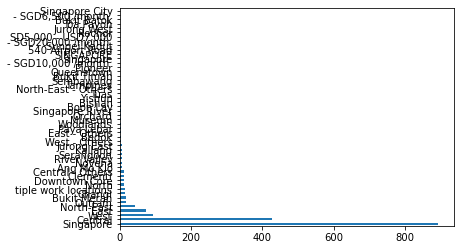

In [72]:
df['Location'].value_counts().plot(kind='barh')

## Skills needed in the Job

In [73]:
skills_list =('Machine learning', 'Python', 'deep learning', 'artificial intelligence', 'keras', 'Pytorch' , 'sci-kit learn', 'sklearn', 
             'SQL', 'cloud','AWS','Azure', 'GCP', 'Hadoop', 'Spark', 'Hive', 'HBase', 'Kafka' , 'computer vision', 
             'Pandas', 'Git' , 'opencv', 'Scala', 'NLP', 'Qlikview', 'PowerBI', 'Qliksense')

In [74]:
df['Skills Needed'] = df['Job Description'].apply(lambda x : returnhits(skills_list, x))

<AxesSubplot:>

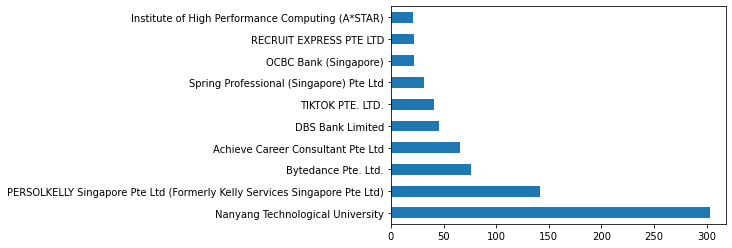

In [75]:
df['Companies'].value_counts().nlargest(10).plot(kind= 'barh')

I'm surprised to see NTU as the main employer of data scientist. But it is possible that the search term data scientist could have captured scientists instead.<br>
I will delete rows that does not have the skills python in the Job Description since arguably, any job posting for data science should contain python or some<br>
programming related terms

In [76]:
df[df['Skills Needed'] == '']['Job Description']

0       AtResearch Instruments, we are committed to fa...
1       Job OverviewWe are hiring a data scientists to...
4       Part time role(3 days per week) and will suppo...
6       Responsibilities:Perform data requirement gath...
10      Recruitfirst is hiring! You will be deployed t...
                              ...                        
2371    TikTok is the leading destination for short-fo...
2381    NTU Continental Corporate Lab invites applicat...
2384    TikTok is the leading destination for short-fo...
2388    Singtel Cognitive and Artificial Intelligence ...
2394    Singtel Cognitive and Artificial Intelligence ...
Name: Job Description, Length: 682, dtype: object

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1750 entries, 0 to 2397
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            1750 non-null   object        
 1   Companies            1750 non-null   object        
 2   Location             1750 non-null   object        
 3   Date posted          1750 non-null   datetime64[ns]
 4   Other information    1750 non-null   object        
 5   Job Description      1750 non-null   object        
 6   URL                  1750 non-null   object        
 7   Pay_average          649 non-null    object        
 8   Qualifications       1750 non-null   object        
 9   Position             1750 non-null   object        
 10  Employment Type      1750 non-null   object        
 11  Years of Experience  1750 non-null   object        
 12  Skills Needed        1750 non-null   object        
dtypes: datetime64[ns](1), object(12)


In [78]:
#deleting job postings without skills keywords
df = df[df['Skills Needed'] != '']

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1068 entries, 2 to 2397
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            1068 non-null   object        
 1   Companies            1068 non-null   object        
 2   Location             1068 non-null   object        
 3   Date posted          1068 non-null   datetime64[ns]
 4   Other information    1068 non-null   object        
 5   Job Description      1068 non-null   object        
 6   URL                  1068 non-null   object        
 7   Pay_average          399 non-null    object        
 8   Qualifications       1068 non-null   object        
 9   Position             1068 non-null   object        
 10  Employment Type      1068 non-null   object        
 11  Years of Experience  1068 non-null   object        
 12  Skills Needed        1068 non-null   object        
dtypes: datetime64[ns](1), object(12)


In [80]:
df.reset_index(inplace = True , drop = True)

In [81]:
df.sample(5)

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed
600,Research Associate (Computer Science/Computer ...,Nanyang Technological University,Singapore,2021-09-15,"Junior Executive Master's Degree, Doctorate (P...",School of Computer Science and Engineering (SC...,http://www.jobstreet.com.sg/en/job/research-as...,NaN,"Master's Degree , Doctorate (PhD)",Junior Executive,Full-Time,Not indicated,"deep learning , Pytorch"
142,Data Scientist,Phillip Securities Pte Ltd,Central,2021-09-11,"Manager Bachelor's Degree, Post Graduate Diplo...",Responsibilities:Understand the business probl...,http://www.jobstreet.com.sg/en/job/data-scient...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Manager,Full-Time,3,"Python , SQL , Hadoop , Spark , Scala , NLP"
470,Serverside R&D Engineer (Middle Platform Data)...,Bytedance Pte. Ltd.,Singapore,2021-09-17,"Junior Executive Bachelor's Degree, Post Gradu...",ByteDance Video Infrastructure is a world-lead...,http://www.jobstreet.com.sg/en/job/serverside-...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,Not indicated,"Python , cloud"
339,Project Officer (Molecular Biology) (R00005504),Nanyang Technological University,Singapore,2021-09-14,"Junior Executive Bachelor's Degree, Post Gradu...",The School of Biological Sciences is looking f...,http://www.jobstreet.com.sg/en/job/project-off...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,Not indicated,Python
551,Computer Assisted Pronunciation Training Scien...,Bytedance Pte. Ltd.,Singapore,2021-09-21,Junior Executive Doctorate (PhD) 1 year Full-T...,ResponsibilitiesBuild core technologies and ca...,http://www.jobstreet.com.sg/en/job/computer-as...,NaN,Doctorate (PhD),Junior Executive,Full-Time,Not indicated,"Python , Pytorch"


Some positions do not really cater for the jobs that I am looking for, so I will eliminate positions that do not have these keywords in the skills list

In [82]:
df['Number of Skills'] = df['Skills Needed'].apply(lambda x : len(x.split(',')))

In [83]:
df['Number of Skills'] = df['Number of Skills'].astype(int)

In [84]:
df['Pay_average'] = pd.to_numeric(df['Pay_average'], errors = 'coerce')

In [85]:
df['Years of Experience'] = pd.to_numeric(df['Years of Experience'], errors = 'coerce')

In [86]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills
0,Data Scientist,SILENT EIGHT PTE. LTD.,Singapore,2021-09-15,Employee Stock Ownership Plan Experienced te...,"At Silent Eight, we develop our own AI-based p...",http://www.jobstreet.com.sg/en/job/data-scient...,5250.0,Not indicated,Senior Executive,Full-Time,3.0,"Python , SQL , Spark , Pandas , Git , NLP",6
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,2021-09-15,"Entry Level Bachelor's Degree, Post Graduate D...",Job descriptionYou will be part of the Data Sc...,http://www.jobstreet.com.sg/en/job/data-analys...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Contract,NaN,"Python , Pandas",2
2,Data Analyst,SISTIC.com Pte Ltd,Paya Lebar,2021-09-21,Singapore's largest ticketing agency & leadin...,We are looking for a Business Intelligence Ana...,http://www.jobstreet.com.sg/en/job/data-analys...,4000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,NaN,"Python , SQL , PowerBI",3
3,Data Analyst,Singapore National Eye Centre,Bedok,2021-09-18,"Senior Executive Bachelor's Degree, Post Gradu...",The digital transformation office is a new dep...,http://www.jobstreet.com.sg/en/job/data-analys...,3500.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Contract,NaN,"Python , SQL , Qlikview",3
4,Data scientist,Spring Professional (Singapore) Pte Ltd,Singapore,2021-09-20,"Junior Executive Diploma, Advanced/Higher/Grad...","About the ClientFounded in 2012, the client is...",http://www.jobstreet.com.sg/en/job/data-scient...,3500.0,"Bachelor's Degree , Diploma , Advanced/Higher/...",Junior Executive,Full-Time,NaN,"Python , SQL",2


In [87]:
#I dont think python as a skill set exists by itself so I will remove job postings with less than 1 skill
df=df[df['Number of Skills'] > 1]

In [88]:
df.reset_index(inplace = True , drop = True)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            639 non-null    object        
 1   Companies            639 non-null    object        
 2   Location             639 non-null    object        
 3   Date posted          639 non-null    datetime64[ns]
 4   Other information    639 non-null    object        
 5   Job Description      639 non-null    object        
 6   URL                  639 non-null    object        
 7   Pay_average          218 non-null    float64       
 8   Qualifications       639 non-null    object        
 9   Position             639 non-null    object        
 10  Employment Type      639 non-null    object        
 11  Years of Experience  393 non-null    float64       
 12  Skills Needed        639 non-null    object        
 13  Number of Skills     639 non-null  

## NLP Time

In [90]:
#TODO include tokenisation/ lemmisation and remove punctuations from JD

In [91]:
#Stop-Word removal
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords

In [92]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Randy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
stop_words = set(stopwords.words('english'))

In [94]:
print(stop_words)

{"that'll", "you've", 'ourselves', 'your', 'in', "doesn't", 'ours', 'had', 'as', 'o', 'it', 'been', 'he', 'their', "needn't", "wouldn't", 'they', 'where', 'should', 'didn', 'own', 'at', 's', 'yours', 'by', "couldn't", 'hers', 'until', 'each', 'ain', 'hasn', 'under', "should've", 'here', 'him', 'any', 'these', 'all', 'because', 'theirs', "you'd", 'is', 'after', 'don', 'themselves', 'more', 'above', 'aren', 'my', 'weren', 'no', 'while', 'not', 'most', "she's", 'himself', 'the', "shan't", "it's", 'some', 'them', 'why', 'her', 'from', 'haven', 'has', 'with', 'such', 'shouldn', "mightn't", 'his', 'we', "you're", 'to', 'then', 'and', "wasn't", 'down', 'once', 're', 'on', 'other', 'am', 'a', 'won', 'y', 'but', 'off', "hasn't", 'further', "didn't", 'against', 'who', 'd', 'so', 'about', 'does', "don't", 'will', 'whom', 'can', 'which', 'be', 'this', 'hadn', 'ma', 'did', 'are', 'before', 'herself', 'how', 'for', 'its', 'myself', 've', 'yourselves', "aren't", 'couldn', 'than', 'both', "weren't", '

In [95]:
#additional stopwords to eliminate
additional_stop_words = ['amp', '.', ',', 'e.g', ":",';','$','/','(',')','&','-',"'",'emailprotected','[',']']
stop_words = stop_words.union(set(additional_stop_words))

In [96]:
df['Processed_JD'] = df['Job Description'].apply(lambda x : ' '.join([word for word in word_tokenize(x) if word.lower() not in stop_words]))

In [97]:
df.head()

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills,Processed_JD
0,Data Scientist,SILENT EIGHT PTE. LTD.,Singapore,2021-09-15,Employee Stock Ownership Plan Experienced te...,"At Silent Eight, we develop our own AI-based p...",http://www.jobstreet.com.sg/en/job/data-scient...,5250.0,Not indicated,Senior Executive,Full-Time,3.0,"Python , SQL , Spark , Pandas , Git , NLP",6,Silent Eight develop AI-based product combats ...
1,Data Analyst - Financial Markets,AMUNDI SINGAPORE LIMITED,Singapore River,2021-09-15,"Entry Level Bachelor's Degree, Post Graduate D...",Job descriptionYou will be part of the Data Sc...,http://www.jobstreet.com.sg/en/job/data-analys...,NaN,"Bachelor's Degree , Diploma , Post Graduate Di...",Entry Level,Contract,NaN,"Python , Pandas",2,Job descriptionYou part Data Science team with...
2,Data Analyst,SISTIC.com Pte Ltd,Paya Lebar,2021-09-21,Singapore's largest ticketing agency & leadin...,We are looking for a Business Intelligence Ana...,http://www.jobstreet.com.sg/en/job/data-analys...,4000.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Junior Executive,Full-Time,NaN,"Python , SQL , PowerBI",3,looking Business Intelligence Analyst strong p...
3,Data Analyst,Singapore National Eye Centre,Bedok,2021-09-18,"Senior Executive Bachelor's Degree, Post Gradu...",The digital transformation office is a new dep...,http://www.jobstreet.com.sg/en/job/data-analys...,3500.0,"Bachelor's Degree , Diploma , Post Graduate Di...",Senior Executive,Contract,NaN,"Python , SQL , Qlikview",3,digital transformation office new department S...
4,Data scientist,Spring Professional (Singapore) Pte Ltd,Singapore,2021-09-20,"Junior Executive Diploma, Advanced/Higher/Grad...","About the ClientFounded in 2012, the client is...",http://www.jobstreet.com.sg/en/job/data-scient...,3500.0,"Bachelor's Degree , Diploma , Advanced/Higher/...",Junior Executive,Full-Time,NaN,"Python , SQL",2,ClientFounded 2012 client internet company lau...


In [98]:
list(df["Processed_JD"].sample())

["Business FunctionGroup Technology Operations enables empowers bank efficient nimble resilient infrastructure strategic focus productivity quality control technology people capability innovation Group managethe majority ofthe Bank 's operational processes inspire delight business partners multiple banking delivery channels.ResponsibilitiesWorking relevant business units establish set requirements align tech debt help build delivery roadmapDesign solutions new problem statements Ex.- natural language query processing self serve requirement real time data visualization etc .Present design multiple review forum socialize build consensus.Lead team build PoC new ideas/experimentsLead team solving road blocks guide implementationCode review verifying design conformanceOwn security type risk guide team improve deliverable qualityCommunicate vendor selecting right product integrate improving needed featureRequirementsCandidate role expected work dynamic team build architecture solution contro

In [99]:
#Using a TF-IDF to find out the common used terms

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(max_features=10)
df_top_ten_words_tfidf = pd.DataFrame(tfidf_model.fit_transform(df['Processed_JD']).todense())
df_top_ten_words_tfidf.columns = sorted(tfidf_model.vocabulary_)
df_top_ten_words_tfidf.head()

,analytics,business,computer,data,experience,learning,machine,science,team,work
0,0.000000,0.221781,0.000000,0.560047,0.054437,0.330534,0.268724,0.124270,0.493206,0.440496
1,0.000000,0.134537,0.000000,0.713446,0.000000,0.150381,0.163014,0.339231,0.384671,0.400820
2,0.069601,0.422133,0.000000,0.868012,0.133217,0.067407,0.073069,0.050685,0.172424,0.059888
3,0.130541,0.113105,0.101659,0.942532,0.249856,0.000000,0.000000,0.095064,0.000000,0.000000
4,0.161396,0.419516,0.125687,0.423749,0.000000,0.468923,0.508313,0.352599,0.000000,0.000000


In [101]:
#List of top ten words found in the Job Description of Data Science related postings
print([word for word in (df_top_ten_words_tfidf.columns)])

['analytics', 'business', 'computer', 'data', 'experience', 'learning', 'machine', 'science', 'team', 'work']


## Questions

<b>Pay</b><br>
<li>Does the pay corelate with years of experience?<br>
<li>What is the average pay<br>
<b>Skills</b><br>
<li>What are the typical skill sets companies are looking for<br>
<li>What is a typical job posting like<br>
<b>Companies</b><br>
<li>What are the kinds of companies that are hiring data-science job seekers?<br>
<li>Which companies offer the highest salaries?<br>
<b>NLP<b><br>
<li>What are the top ten words found in Job Descriptions?<br>
<li>What are the top ten trigrams found in Job Descriptions?<br>

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            639 non-null    object        
 1   Companies            639 non-null    object        
 2   Location             639 non-null    object        
 3   Date posted          639 non-null    datetime64[ns]
 4   Other information    639 non-null    object        
 5   Job Description      639 non-null    object        
 6   URL                  639 non-null    object        
 7   Pay_average          218 non-null    float64       
 8   Qualifications       639 non-null    object        
 9   Position             639 non-null    object        
 10  Employment Type      639 non-null    object        
 11  Years of Experience  393 non-null    float64       
 12  Skills Needed        639 non-null    object        
 13  Number of Skills     639 non-null  

In [103]:
df.drop_duplicates(subset='Job Description' ,inplace = True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525 entries, 0 to 638
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Job Title            525 non-null    object        
 1   Companies            525 non-null    object        
 2   Location             525 non-null    object        
 3   Date posted          525 non-null    datetime64[ns]
 4   Other information    525 non-null    object        
 5   Job Description      525 non-null    object        
 6   URL                  525 non-null    object        
 7   Pay_average          169 non-null    float64       
 8   Qualifications       525 non-null    object        
 9   Position             525 non-null    object        
 10  Employment Type      525 non-null    object        
 11  Years of Experience  316 non-null    float64       
 12  Skills Needed        525 non-null    object        
 13  Number of Skills     525 non-null  

In [105]:
df.columns

Index(['Job Title', 'Companies', 'Location', 'Date posted',
       'Other information', 'Job Description', 'URL', 'Pay_average',
       'Qualifications', 'Position', 'Employment Type', 'Years of Experience',
       'Skills Needed', 'Number of Skills', 'Processed_JD'],
      dtype='object')

In [106]:
from datetime import timedelta

In [107]:
max(df['Date posted'])

Timestamp('2021-09-21 00:00:00')

In [108]:
min(df['Date posted'])

Timestamp('2021-08-24 00:00:00')

In [109]:
max(df['Date posted']) - min(df['Date posted'])

Timedelta('28 days 00:00:00')

In [110]:
date_range = np.timedelta64(max(df['Date posted']) - min(df['Date posted']), 'D').astype(int)

In [111]:
df.reset_index(inplace = True, drop = True)

In [112]:
df['Pay_average'].describe()

count      169.000000
mean      5253.313609
std       1625.411568
min       1700.000000
25%       4000.000000
50%       5000.000000
75%       6250.000000
max      10500.000000
Name: Pay_average, dtype: float64

Text(0, 0.5, 'Average Pay')

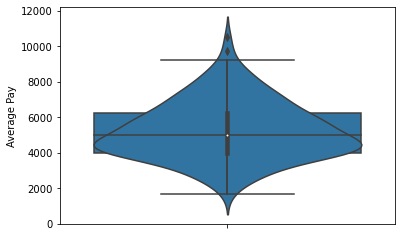

In [113]:
sns.boxplot(y = df['Pay_average'])
sns.violinplot(y = df['Pay_average'])
plt.ylabel("Average Pay")

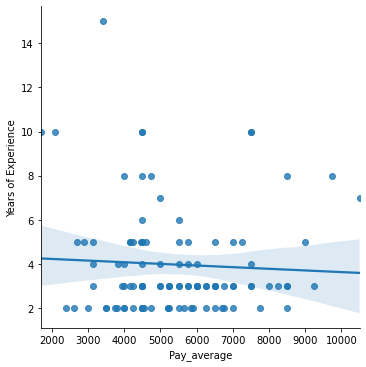

In [114]:
sns.lmplot(data = df, x= 'Pay_average', y = 'Years of Experience')

In [115]:
df.corr()

,Pay_average,Years of Experience,Number of Skills
Pay_average,1.000000,-0.053293,0.061923
Years of Experience,-0.053293,1.000000,0.135466
Number of Skills,0.061923,0.135466,1.000000


<AxesSubplot:>

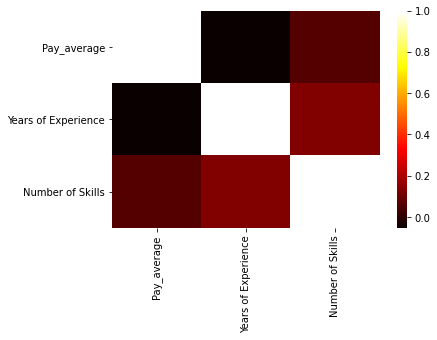

In [116]:
sns.heatmap(df.select_dtypes(exclude=['object','datetime64']).corr(), cmap = 'hot')

Text(0.5, 0, 'Number of Jobs Posted')

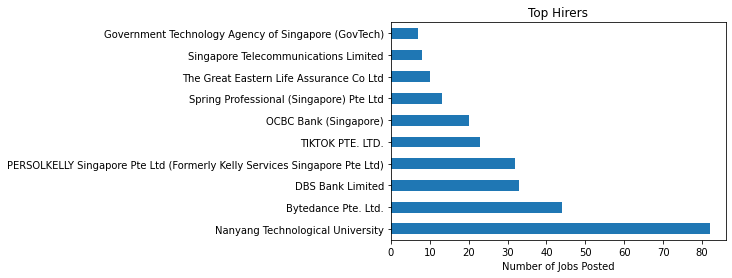

In [117]:
df['Companies'].value_counts().nlargest(10).plot(kind= 'barh')
plt.title('Top Hirers')
plt.xlabel('Number of Jobs Posted')

In [118]:
top_ten_hirer = list(df['Companies'].value_counts().nlargest(10).index)

df['Companies'].filter(lambda x : x['Companies'] in top_ten_hirer)

In [119]:
df[df['Companies'].isin(top_ten_hirer)].groupby('Companies', sort = True).mean()

,Pay_average,Years of Experience,Number of Skills
Companies,,,
Bytedance Pte. Ltd.,5253.125000,2.473684,3.113636
DBS Bank Limited,5394.444444,6.357143,4.848485
Government Technology Agency of Singapore (GovTech),5650.000000,3.000000,5.714286
Nanyang Technological University,5316.363636,3.785714,2.451220
OCBC Bank (Singapore),5325.000000,5.058824,4.400000
PERSOLKELLY Singapore Pte Ltd (Formerly Kelly Services Singapore Pte Ltd),5395.833333,3.555556,2.531250
Singapore Telecommunications Limited,4500.000000,4.125000,6.500000
Spring Professional (Singapore) Pte Ltd,5625.000000,4.700000,4.307692
TIKTOK PTE. LTD.,5027.777778,2.538462,2.652174


([<matplotlib.axis.XTick at 0x21cd30e5a30>,
 [Text(0, 0, 'ByteDance'),
  Text(1, 0, 'DBS'),
  Text(2, 0, 'GovTech'),
  Text(3, 0, 'NTU'),
  Text(4, 0, 'OCBC'),
  Text(5, 0, 'Kelly Services'),
  Text(6, 0, 'Singtel'),
  Text(7, 0, 'Spring'),
  Text(8, 0, 'Tiktok'),
  Text(9, 0, 'Great Eastern')])

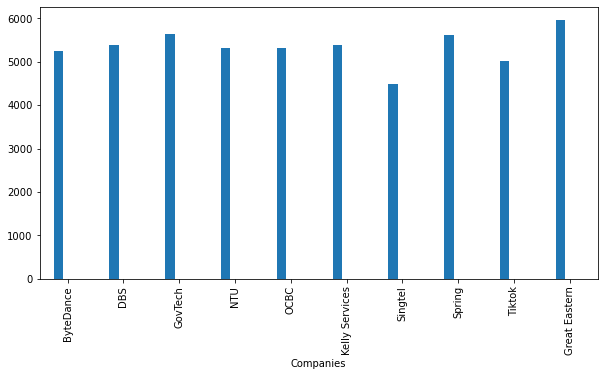

In [168]:
df[df['Companies'].isin(top_ten_hirer)].groupby('Companies', sort = True).mean().plot(kind = 'bar', figsize=(10,5), legend = False)
plt.xticks(range(10),labels=('ByteDance', 'DBS','GovTech','NTU','OCBC','Kelly Services','Singtel','Spring','Tiktok', 'Great Eastern'),rotation=90)

In [121]:
df[df['Companies'].isin(top_ten_hirer)].groupby('Companies', sort = True).count()['Job Title']

Companies
Bytedance Pte. Ltd.                                                          44
DBS Bank Limited                                                             33
Government Technology Agency of Singapore (GovTech)                           7
Nanyang Technological University                                             82
OCBC Bank (Singapore)                                                        20
PERSOLKELLY Singapore Pte Ltd (Formerly Kelly Services Singapore Pte Ltd)    32
Singapore Telecommunications Limited                                          8
Spring Professional (Singapore) Pte Ltd                                      13
TIKTOK PTE. LTD.                                                             23
The Great Eastern Life Assurance Co Ltd                                      10
Name: Job Title, dtype: int64

In [122]:
#Top ten companies that are paying the highest
df.groupby(by='Companies')['Pay_average'].mean().nlargest(10)

Companies
Helius Technologies Pte Ltd              9750.0
Lam Research Singapore Pte Ltd           9250.0
Office Productivity Solution Pte Ltd.    9000.0
Carousell Pte Ltd                        8500.0
Newbridge Alliance Pte Ltd               8500.0
Shell Infotech Pte Ltd                   8000.0
Talent Trader Group Pte Ltd - IT         7500.0
VOLT                                     7500.0
Informa Markets                          7000.0
Kaishi Partners                          7000.0
Name: Pay_average, dtype: float64

In [123]:
df[df['Companies'] == 'Helius Technologies Pte Ltd']

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills,Processed_JD
18,Data Engineer (Permanent Role),Helius Technologies Pte Ltd,Central,2021-09-19,"Junior Executive Diploma, Advanced/Higher/Grad...","Data Engineer (Permanent Role, Central Singapo...",http://www.jobstreet.com.sg/en/job/data-engine...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Junior Executive,Full-Time,3.0,"SQL , cloud , AWS , Azure , GCP , Spark",6,Data Engineer Permanent Role Central Singapore...
45,Senior Data Engineer (Permanent Role),Helius Technologies Pte Ltd,Singapore,2021-09-19,"Senior Executive Diploma, Advanced/Higher/Grad...","Senior Data Engineer (Permanent Role, Central ...",http://www.jobstreet.com.sg/en/job/senior-data...,9750.0,"Bachelor's Degree , Diploma , Advanced/Higher/...",Senior Executive,Full-Time,8.0,"SQL , cloud , AWS , Azure , GCP , Spark",6,Senior Data Engineer Permanent Role Central Si...
415,Power Bi Developer (Central Singapore) - CONTR...,Helius Technologies Pte Ltd,Central,2021-09-16,"Junior Executive Diploma, Advanced/Higher/Grad...",Our client is currently in need to onboard Two...,http://www.jobstreet.com.sg/en/job/power-bi-de...,NaN,"Bachelor's Degree , Diploma , Advanced/Higher/...",Junior Executive,Contract,4.0,"SQL , PowerBI",2,client currently need onboard Two 2 PowerBI De...


In [124]:
df[df['Companies'] == 'Lam Research Singapore Pte Ltd']

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills,Processed_JD
105,Data Scientist (Image Processing/ Computer Vis...,Lam Research Singapore Pte Ltd,Singapore,2021-09-13,Leading supplier of wafer fabrication equipme...,Position Summary:This position will be working...,http://www.jobstreet.com.sg/en/job/data-scient...,9250.0,Master's Degree,Senior Executive,Full-Time,3.0,"Python , deep learning , SQL , Spark , HBase ,...",6,Position Summary position working multi-dimens...


Text(0.5, 0, 'Number of Jobs Posted')

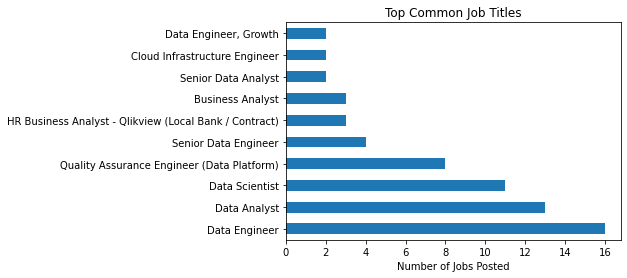

In [125]:
df['Job Title'].value_counts().nlargest(10).plot(kind= 'barh')
plt.title('Top Common Job Titles')
plt.xlabel('Number of Jobs Posted')

Text(0.5, 0, 'Number of Jobs Posted')

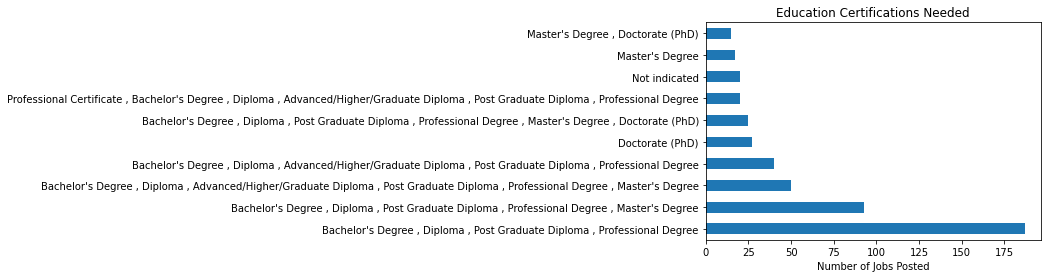

In [126]:
df['Qualifications'].value_counts().nlargest(10).plot(kind= 'barh')
plt.title('Education Certifications Needed')
plt.xlabel('Number of Jobs Posted')

In [127]:
df['Number of Skills'].value_counts()

2     224
3     111
4      49
6      47
5      44
7      22
8      17
10      5
9       5
12      1
Name: Number of Skills, dtype: int64

In [128]:
df[df['Number of Skills'] == 12]

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills,Processed_JD
70,Data Scientist - IoT Services,Siemens Pte Ltd,North-East,2021-09-13,Senior Executive Master's Degree 2 years Full-...,Job DescriptionWe are looking for a Data Scien...,http://www.jobstreet.com.sg/en/job/data-scient...,NaN,Master's Degree,Senior Executive,Full-Time,2.0,"Python , deep learning , artificial intelligen...",12,Job DescriptionWe looking Data Scientist Digit...


Text(0.5, 0, 'Number of Jobs Posted')

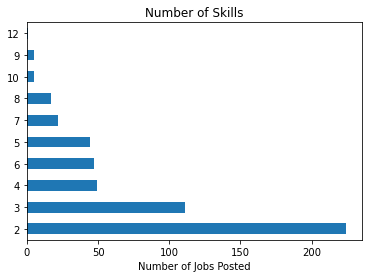

In [129]:
df['Number of Skills'].value_counts().plot(kind= 'barh')
plt.title('Number of Skills')
plt.xlabel('Number of Jobs Posted')

Text(0.5, 0, 'Number of Jobs Posted')

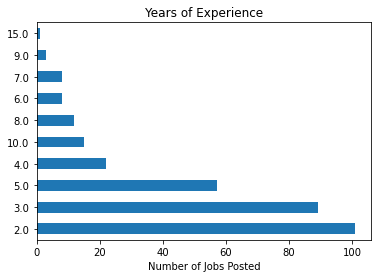

In [130]:
df['Years of Experience'].value_counts().nlargest(10).plot(kind= 'barh')
plt.title('Years of Experience')
plt.xlabel('Number of Jobs Posted')

C:\Users\Randy\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Randy\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


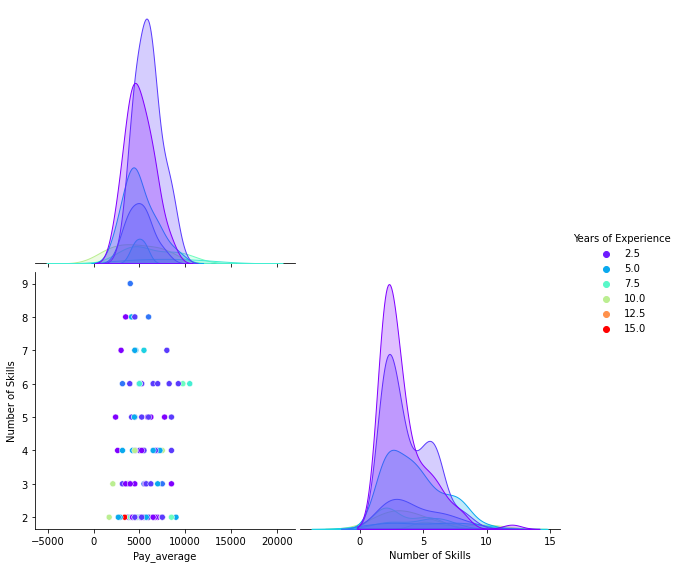

In [131]:
sns.pairplot(data = df,hue='Years of Experience' ,corner  =True, palette= 'rainbow',height =4)

In [132]:
df[(df['Years of Experience'] >= 2) & (df['Number of Skills'] > 10)]

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills,Processed_JD
70,Data Scientist - IoT Services,Siemens Pte Ltd,North-East,2021-09-13,Senior Executive Master's Degree 2 years Full-...,Job DescriptionWe are looking for a Data Scien...,http://www.jobstreet.com.sg/en/job/data-scient...,NaN,Master's Degree,Senior Executive,Full-Time,2.0,"Python , deep learning , artificial intelligen...",12,Job DescriptionWe looking Data Scientist Digit...


C:\Users\Randy\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Randy\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


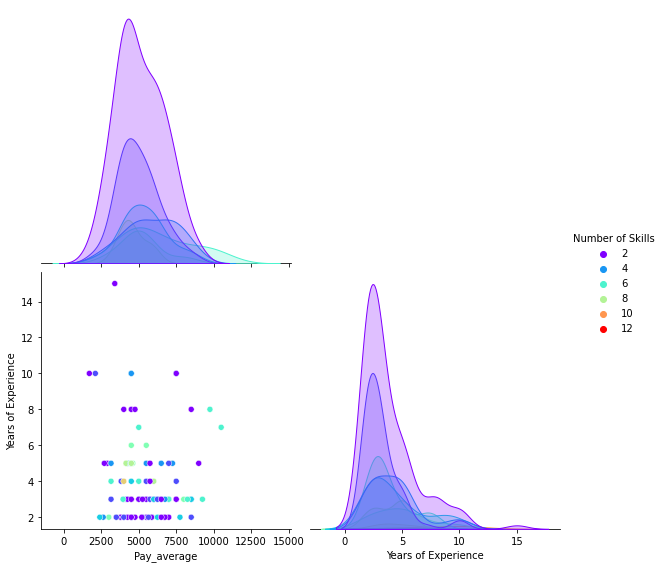

In [133]:
sns.pairplot(data = df,hue='Number of Skills', corner  =True, palette= 'rainbow',height =4)

In [134]:
df['Number of Skills'].describe()

count    525.000000
mean       3.573333
std        1.945060
min        2.000000
25%        2.000000
50%        3.000000
75%        5.000000
max       12.000000
Name: Number of Skills, dtype: float64

<AxesSubplot:>

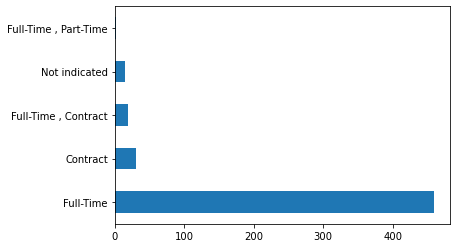

In [135]:
df["Employment Type"].value_counts().plot(kind='barh')

In [136]:
df[df["Employment Type"] == 'Full-Time , Part-Time']

,Job Title,Companies,Location,Date posted,Other information,Job Description,URL,Pay_average,Qualifications,Position,Employment Type,Years of Experience,Skills Needed,Number of Skills,Processed_JD
50,Data Engineer,Quinnox Solutions Pte Ltd,Central,2021-09-16,"Manager Professional Certificate/NiTEC, Diplom...",Responsibilities:Help to design and implement ...,http://www.jobstreet.com.sg/en/job/data-engine...,NaN,"Professional Certificate , Bachelor's Degree ,...",Manager,"Full-Time , Part-Time",5.0,"Python , SQL , cloud , AWS , Azure , GCP , Spa...",8,Responsibilities Help design implement optimal...


<AxesSubplot:>

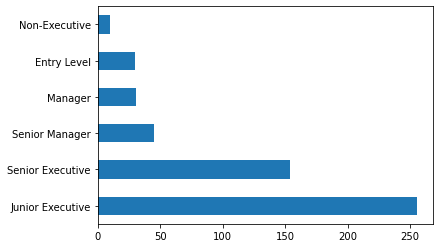

In [137]:
df["Position"].value_counts().plot(kind='barh')

In [138]:
list(df[df['Position'] == 'Junior Executive'].sample()['Job Description'])

['► Work Location: East &amp; West (Company transport provided)► 5 days’ work week► Basic salary up to S$ 4,300 + AWS + VB► Good in data analysis &amp; Lean PrinciplesOur client is a global leader specialized in international transportation, freight forwarder, supply chain management and packaging solutions with offices in over 20 countries.Job scopes:Leverage on lean principles to increase operational performance and optimise warehouse resources, creating value for internal and external stakeholdersSpearhead continuous improvement projects within the warehouse, from process gap identification to solution design and implementation, as well as operational change managementSupport the Operations Manager in the monitoring and analysis of performance data such as KPI and productivity reports, as well as financial data such as billing reports and account P&amp;LPartner with the Key Account Manager in business development efforts through maintenance of customer satisfaction and solutioning o

In [139]:
df.shape[0]

525

In [140]:
from nltk.util import ngrams

In [141]:
corpus = ' '.join(jd for jd in df['Processed_JD'])

In [142]:
pd.Series(ngrams(corpus.split(),3)).value_counts().nlargest(20)

(regret, shortlisted, candidates)       109
(shortlisted, candidates, notified)      91
(degree, Computer, Science)              90
(Computer, Science, Engineering)         72
(invites, applications, position)        60
(applications, position, Research)       51
(mission, inspire, creativity)           46
(machine, learning, deep)                44
(Computer, Science, Computer)            43
(years, working, experience)             43
(Computer, Science, related)             43
(learning, deep, learning)               41
('s, degree, Computer)                   40
(machine, learning, models)              37
(Science, Computer, Engineering)         37
(natural, language, processing)          35
(Degree, Computer, Science)              34
(least, 3, years)                        31
(School, Computer, Science)              31
(environment, supports, development)     30
dtype: int64

<b>Pay</b><br>
<li>Does the pay corelate with years of experience?<br>
    The findings suggest it is not strongly correlated at 0.10 however I think the data is not very accurate since the amount of years posted is not the very accurate
<li>What is the average pay<br>
Around SGD5K from 100 samples<br>
<b>Skills</b><br>
<li>What are the typical skill sets companies are looking for<br>
<li>What is a typical job posting like<br>
<b>Companies</b><br>
<li>What are the kinds of companies that are hiring data-science job seekers?<br>
<li>Which companies offer the highest salaries?<br>
<b>NLP</b><br>
<li>What are the top ten words found in Job Descriptions?<br>
<li>What are the top ten trigrams found in Job Descriptions?<br>

In [143]:
df.to_csv('Cleaned_Data_Science_{}_file.csv'.format(date.today()), index = True)